### Time Series: Explore Lesson
**Corey Solitaire**   
10.28.2020

In [1]:
# data manipulation 
import numpy as np
import pandas as pd

from datetime import datetime
import itertools

# data visualization 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

from sklearn.model_selection import TimeSeriesSplit

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

from acquire import get_store_data, opsd_germany_daily
from prepare import prepped_store_df, prepped_energy_df

# Store DF

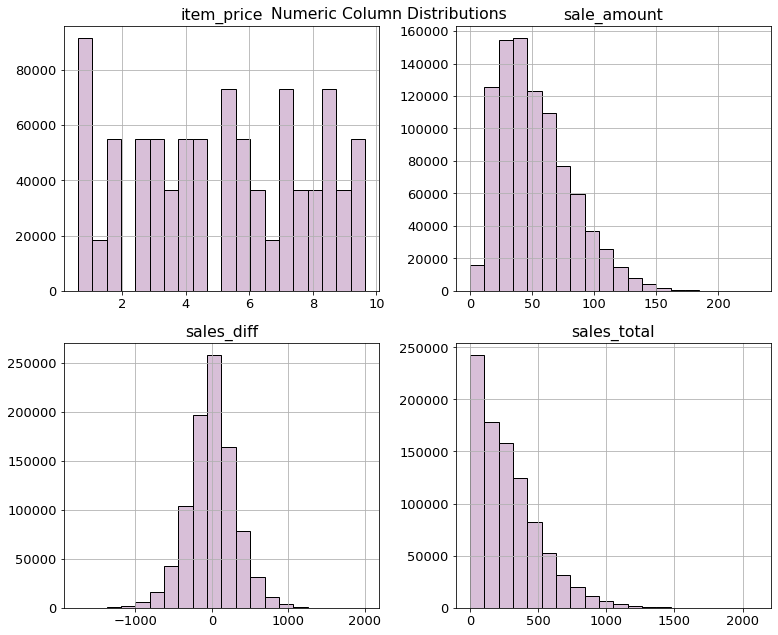

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,weekday,sales_total,sales_diff
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92,NaN
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,218.40,207.48
2013-01-01 00:00:00+00:00,27.0,832657,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mama Marys,46,Pizza Sauce,4.65,35457770664,35457770664,1,Tuesday,125.55,-92.85
2013-01-01 00:00:00+00:00,54.0,213643,15000 San Pedro Ave,San Antonio,8,TX,78232,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,453.60,328.05
2013-01-01 00:00:00+00:00,35.0,215469,735 SW Military Dr,San Antonio,9,TX,78221,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,294.00,-159.60


In [2]:
df = get_store_data()
store_df = prepped_store_df(df)
store_df.head()

# Energy DF

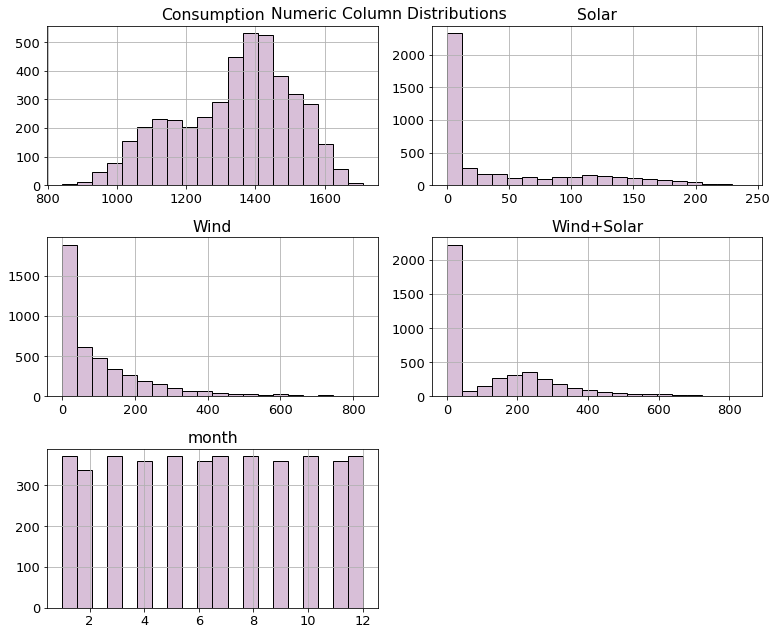

,Consumption,Wind,Solar,Wind+Solar,month,weekday
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,1,Sunday
2006-01-02,1380.521,0.0,0.0,0.0,1,Monday
2006-01-03,1442.533,0.0,0.0,0.0,1,Tuesday
2006-01-04,1457.217,0.0,0.0,0.0,1,Wednesday
2006-01-05,1477.131,0.0,0.0,0.0,1,Thursday


In [3]:
df = opsd_germany_daily()
energy_df = prepped_energy_df(df)
energy_df.head()

### Using your store items data you prepped in lesson 2 exercises:

1. Split your data into train and test using the sklearn.model_selection.TimeSeriesSplit method.

2. Validate your splits by plotting X_train and y_train.

3. Plot the weekly average & the 7-day moving average. Compare the 2 plots.

4. Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

5. Plot a time series decomposition.

6. Create a lag plot (day over day).

7. Run a lag correlation.

### Using your OPS data you prepped in lesson 2 exercises:

1. Split your data into train and test using the percent cutoff method.

2. Validate your splits by plotting X_train and y_train.

3. Plot the weekly average & the 7-day moving average. Compare the 2 plots.

4. Group the electricity consumption time series by month of year, to explore annual seasonality.

5. Plot the daily difference. Observe whether usage seems to vary drastically from day to day or has more of a smooth transition.

6. Plot a time series decomposition. Takeaways?

### Bonus:

If time:

For each store I want to see how many items were sold over a period of time, for each item. Find a way to chart this. Hints: Subplots for the piece with the fewest distinct values (like store), x = time, y = count, color = item. If you have too many distinct items, you may need to plot the top n, while aggregating the others into an 'other' bucket. 